<a href="https://colab.research.google.com/github/Manoj-Kumar-Paliviri/github-slideshow/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/PYTHON-APRIL/Machine Learning/Data Sets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
#output :purchased
#input: Age and estimated salary
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [5]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [6]:
#How many people purchased?
#Method 1
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

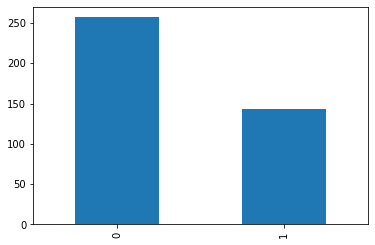

In [7]:
df['Purchased'].value_counts().plot(kind='bar')

In [8]:
#Method 2:
p=df['Purchased'].values
import numpy as np
np.unique(p,return_counts=True)

(array([0, 1]), array([257, 143]))

In [9]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)        #test_size=0.25

In [10]:
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [11]:
#Normalization : Bringing value in a scale of 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [14]:
# Logistic Regression
# Maths
# 1. Input and Output
# 2. Apply fit method (Optmizer runs)
# Output will be the coefficients and intercepts
# y = m1x1+m2x2+c
# 3. Sigmoid Function to get probabilities
# 4. take max index op

In [15]:
#Step 2:
model.coef_

array([[4.89232634, 2.53768971]])

In [16]:
model.coef_[0][0]

4.892326339054485

In [17]:
model.intercept_

array([-4.08983426])

In [18]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [19]:
def prediction(age,sal):
  m1=model.coef_[0][0]
  m2=model.coef_[0][1]
  c=model.intercept_[0]
  return sigmoid( (m1*age) + (m2*sal) + c)

In [20]:
age=x_test[0][0]
sal=x_test[0][1]
prediction(age,sal)

0.2077416625552371

In [21]:
age=x_test[-1][0]
sal=x_test[-1][1]
prediction(age,sal)

0.593577910580032

In [22]:
# Assignment : Write a code to find probabilities of all the values and store it in a list
list=[]
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))
def prediction(age,sal):
  m1=model.coef_[0][0]
  m2=model.coef_[0][1]
  c=model.intercept_[0]
  return sigmoid( (m1*age) + (m2*sal) + c)
for i in range(len(x_test)):
  for j in range(1):
    age=x_test[i][j]
    sal=x_test[i][j+1]
    list.append(prediction(age,sal))
    i+=1
    j+=1
print(list)
print(len(list))

[0.2077416625552371, 0.249321264526965, 0.2725457070014823, 0.1840757993364383, 0.18974201312582945, 0.049855270364473486, 0.07072912912845453, 0.6062987618200942, 0.04337384446250629, 0.4537665076356603, 0.11375918831126809, 0.10219349084905953, 0.24513479630106239, 0.38267404796932036, 0.07431442633528018, 0.3677937760036568, 0.32933782148499163, 0.06552756782402334, 0.9154295083051797, 0.12152974313680233, 0.181223440155359, 0.8472384660273559, 0.32432065681432876, 0.7271069729566202, 0.036860976074612965, 0.8687189156699655, 0.17199409483212752, 0.16985431752228167, 0.27029092738912674, 0.24519196911348612, 0.08563387192985479, 0.3376943163332661, 0.7856559887507414, 0.23824483226297818, 0.07026476890220933, 0.03247347305768771, 0.08445890903972532, 0.15449723399529133, 0.09811148846345975, 0.47899243686008675, 0.1585246789809351, 0.3284534506900845, 0.1487502033155478, 0.11757281610477316, 0.656027681876165, 0.09681045462436261, 0.34191129303803, 0.7825260285138452, 0.053352949952

In [24]:
# Evaluation : Accuracy, Precision/Recall
# Confusion Matrix

print(np.unique(y_pred,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([77, 23]))
(array([0, 1]), array([68, 32]))


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
confusion_matrix(y_pred,y_test)

array([[67, 10],
       [ 1, 22]])

In [ ]:
# 67-True negative
# 1-False negative
# 10 -False positive
# 22 -True positive

In [27]:
#Accuracy = (sum of true values)/total sum
(67+22)/(67+10+1+22)

0.89

In [28]:
accuracy_score(y_pred,y_test)

0.89

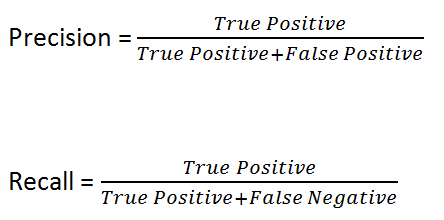

In [29]:
confusion_matrix(y_pred,y_test)

array([[67, 10],
       [ 1, 22]])

In [43]:
#Assignment : Find Precision and recall of 0 and 1 wrt the above formula(Maths)

p1=(22)/(22+67)         #1 - Precision
p2=(67)/(67+1)          #0 - Precision
r1=(22)/(1+22)          #1 - Recall
r2=(10)/(10+67)         #0 - Recall
print(f'1 - Precision={p1}\t0 - Precision={p2}')   
print(f'1 - Recall={r1}\t0 - Recall={r2}')   

1 - Precision=0.24719101123595505	0 - Precision=0.9852941176470589
1 - Recall=0.9565217391304348	0 - Recall=0.12987012987012986


In [34]:
#classification report gives precision,recall,and f1-score between predicted and tested value
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.69      0.96      0.80        23

    accuracy                           0.89       100
   macro avg       0.84      0.91      0.86       100
weighted avg       0.92      0.89      0.90       100



In [ ]:
#When data is balanced accuracy is considered
#When data is imbalanced precision/recall is considered